## Modelar Estatisticas com Statsmodel

In [1]:
## Construção de MOdelos de Regressão Linear

In [27]:
### Passo 1 - importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# carregar os dados
data= pd.read_csv('consumo_energia.csv')


In [6]:
data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [7]:
data.rename(columns={'Lagging_Current_Power_Factor':'Atrasado',
                     'Leading_Current_Power_Factor':'Adiantado',
                     'Load_Type':'tipo_carga',
                     'CO2(tCO2)':'CO2'
                    },inplace = True
                   )
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Atrasado,Adiantado,NSM,WeekStatus,Day_of_week,tipo_carga
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [8]:
#definir variaveis indenpendentes e dependsetes
X= data[['Atrasado','Adiantado','CO2']]
y=data['Usage_kWh']

In [9]:
X.head()

,Atrasado,Adiantado,CO2
0,73.21,100.0,0.0
1,66.77,100.0,0.0
2,70.28,100.0,0.0
3,68.09,100.0,0.0
4,64.72,100.0,0.0


In [12]:
#Adicionando a constante como o intercepto 
X= sm.add_constant(X)

In [13]:
#ajustar modelo de regressão linear multipla
modelo= sm.OLS(y,X)  # metodo dos minimos quadrados ordinarios
results = modelo.fit()



In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.904e+05
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:57:09   Log-Likelihood:            -1.0681e+05
No. Observations:               35040   AIC:                         2.136e+05
Df Residuals:                   35036   BIC:                         2.137e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9957      0.279     -3.569      0.0

In [4]:
data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [9]:
#calcular a matriz de correlação 
data_corr= data[['Usage_kWh','Atrasado','Adiantado','CO2']]


In [11]:
correlation_data =data_corr.corr()
display(correlation_data)

,Usage_kWh,Atrasado,Adiantado,CO2
Usage_kWh,1.000000,0.385960,0.353566,0.988180
Atrasado,0.385960,1.000000,-0.519967,0.379605
Adiantado,0.353566,-0.519967,1.000000,0.360019
CO2,0.988180,0.379605,0.360019,1.000000


<Axes: >

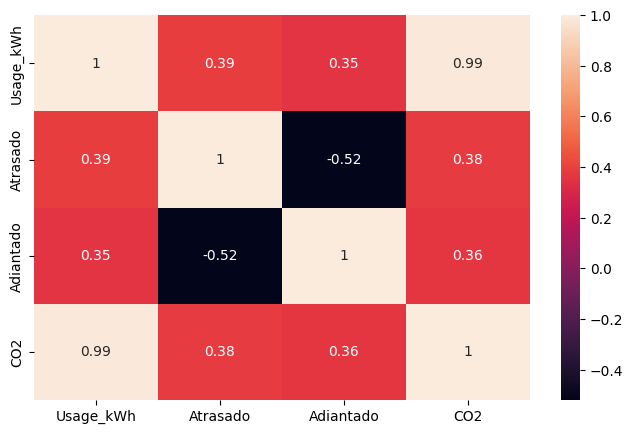

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_data, annot=True)

In [32]:
# variation inflation factor
a = sm.add_constant(correlation_data)
vlf_series= pd.Series([variance_inflation_factor(a.values,1) for i in range(a.shape[1])],index= a.columns)
vlf_series

const        100414.832283
Atrasado     100414.832283
Adiantado    100414.832283
CO2          100414.832283
dtype: float64